In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

In [22]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [23]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [24]:
rho = 0.02                              # host input function
mu = 0.02                               # basline mortality rate
sigmaS = 1                            # vulnerability of suscpetible hosts to infection
sigmaI = 5                            # vulnerability of infected hosts to infection
alpha1 = 0.03                           # virulence of a host infected by 1
beta1 = 0.4                          # transmission rate of strain 1 in single infection

In [25]:
#rho_values = np.arange(start=0, stop=0.11, step=0.01)
#mu_values = np.arange(start=0, stop=0.11, step=0.01)
#sigmaS_values = np.arange(start=0, stop=11, step=1)
#sigmaI_values = np.arange(start=0, stop=11, step=1)
#alpha1_values = np.arange(start=0, stop=0.11, step=0.01)
#beta1_values = np.arange(start=0, stop=1.1, step=0.1)

# Coexistence Regions

# $\beta_1$ & $\rho$

In [26]:
rho_values = np.arange(start=0, stop=0.11, step=0.01)
beta1_values = np.arange(start=0, stop=1.1, step=0.1)

In [27]:
Grid = np.zeros((11,11))

In [28]:
for i in range(11):
    beta1 = beta1_values[i]
    for n in range(11):
        rho = rho_values[n]
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]
        
        Grid[n][i] = 1
    
        if Ss[1999] < 0.001:
             Grid[n][i] = 0
                
        if I1s[1999] < 0.001:
             Grid[n][i] = 0
                
        if D11s[1999] < 0.001:
             Grid[n][i] = 0

Text(0, 0.5, '$\\rho$')

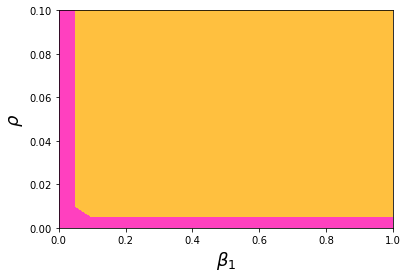

In [29]:
colourmap = plt.contourf(beta1_values, rho_values, Grid, 1, cmap='spring')
values = [0,1]
#cbar = plt.colorbar(colourmap,ticks = values, label='Coexistence?')
#cbar.set_ticklabels(["No", "Yes"])
#plt.title(r'Regions of Coexistence', fontsize=18)
#plt.xlabel(r'Value of $\beta_1$', fontsize=18)
#plt.ylabel(r'Value of $\rho$', fontsize=18)

plt.xlabel(r'$\beta_1$', fontsize=18)
plt.ylabel(r'$\rho$', fontsize=18)

# $\beta_1$ & $\mu$

In [30]:
rho = 0.02

In [31]:
mu_values = np.arange(start=0, stop=0.11, step=0.01)
beta1_values = np.arange(start=0, stop=1.1, step=0.1)

In [32]:
Grid = np.zeros((11,11))

In [33]:
for i in range(11):
    beta1 = beta1_values[i]
    for n in range(11):
        mu = mu_values[n]
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]
        
        Grid[n][i] = 1
    
        if Ss[1999] < 0.001:
             Grid[n][i] = 0
                
        if I1s[1999] < 0.001:
             Grid[n][i] = 0
                
        if D11s[1999] < 0.001:
             Grid[n][i] = 0

Text(0, 0.5, '$\\mu$')

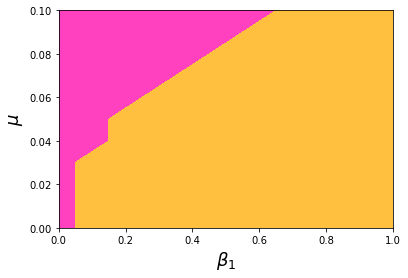

In [34]:
colourmap = plt.contourf(beta1_values, mu_values, Grid, 1, cmap='spring')
values = [0,1]
#cbar = plt.colorbar(colourmap,ticks = values, label='Coexistence?')
#cbar.set_ticklabels(["No", "Yes"])
#plt.title(r'Regions of Coexistence', fontsize=18)
#plt.xlabel(r'Value of $\beta_1$', fontsize=18)
#plt.ylabel(r'Value of $\mu$', fontsize=18)

plt.xlabel(r'$\beta_1$', fontsize=18)
plt.ylabel(r'$\mu$', fontsize=18)

# $\beta_1$ & $\sigma_S$

In [35]:
mu = 0.02

In [36]:
sigmaS_values = np.arange(start=0, stop=11, step=1)
beta1_values = np.arange(start=0, stop=1.1, step=0.1)

In [37]:
Grid = np.zeros((11,11))

In [38]:
for i in range(11):
    beta1 = beta1_values[i]
    for n in range(11):
        sigmaS = sigmaS_values[n]
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]
        
        Grid[n][i] = 1
    
        if Ss[1999] < 0.001:
             Grid[n][i] = 0
                
        if I1s[1999] < 0.001:
             Grid[n][i] = 0
                
        if D11s[1999] < 0.001:
             Grid[n][i] = 0

Text(0, 0.5, 'Value of $\\sigma_S$')

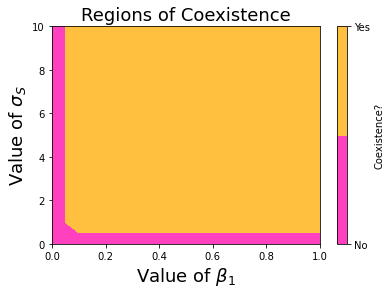

In [39]:
colourmap = plt.contourf(beta1_values, sigmaS_values, Grid, 1, cmap='spring')
values = [0,1]
cbar = plt.colorbar(colourmap,ticks = values, label='Coexistence?')
cbar.set_ticklabels(["No", "Yes"])
plt.title(r'Regions of Coexistence', fontsize=18)
plt.xlabel(r'Value of $\beta_1$', fontsize=18)
plt.ylabel(r'Value of $\sigma_S$', fontsize=18)

# $\beta_1$ & $\sigma_I$

In [40]:
sigmaS = 1

In [41]:
sigmaI_values = np.arange(start=0, stop=11, step=1)
beta1_values = np.arange(start=0, stop=1.1, step=0.1)

In [42]:
Grid = np.zeros((11,11))

In [43]:
for i in range(11):
    beta1 = beta1_values[i]
    for n in range(11):
        sigmaI = sigmaI_values[n]
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]
        
        Grid[n][i] = 1
    
        if Ss[1999] < 0.001:
             Grid[n][i] = 0
                
        if I1s[1999] < 0.001:
             Grid[n][i] = 0
                
        if D11s[1999] < 0.001:
             Grid[n][i] = 0

Text(0, 0.5, 'Value of $\\sigma_I$')

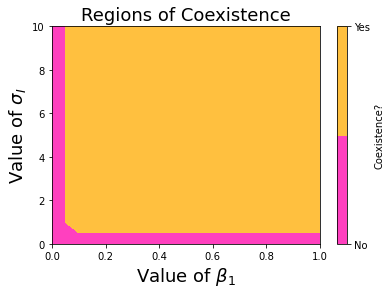

In [44]:
colourmap = plt.contourf(beta1_values, sigmaI_values, Grid, 1, cmap='spring')
values = [0,1]
cbar = plt.colorbar(colourmap,ticks = values, label='Coexistence?')
cbar.set_ticklabels(["No", "Yes"])
plt.title(r'Regions of Coexistence', fontsize=18)
plt.xlabel(r'Value of $\beta_1$', fontsize=18)
plt.ylabel(r'Value of $\sigma_I$', fontsize=18)

# $\beta_1$ & $\alpha_1$

In [45]:
sigmaI = 5

In [46]:
alpha1_values = np.arange(start=0, stop=0.11, step=0.01)
beta1_values = np.arange(start=0, stop=1.1, step=0.1)

In [47]:
Grid = np.zeros((11,11))

In [48]:
for i in range(11):
    beta1 = beta1_values[i]
    for n in range(11):
        alpha1 = alpha1_values[n]
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]
        
        Grid[n][i] = 1
    
        if Ss[1999] < 0.001:
             Grid[n][i] = 0
                
        if I1s[1999] < 0.001:
             Grid[n][i] = 0
                
        if D11s[1999] < 0.001:
             Grid[n][i] = 0

Text(0, 0.5, '$\\alpha_1$')

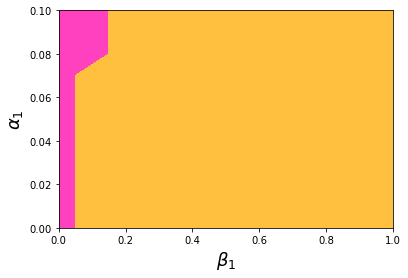

In [49]:
colourmap = plt.contourf(beta1_values, alpha1_values, Grid, 1, cmap='spring')
values = [0,1]
#cbar = plt.colorbar(colourmap,ticks = values, label='Coexistence?')
#cbar.set_ticklabels(["No", "Yes"])
#plt.title(r'Regions of Coexistence', fontsize=18)
#plt.xlabel(r'Value of $\beta_1$', fontsize=18)
#plt.ylabel(r'Value of $\alpha_1$', fontsize=18)

plt.xlabel(r'$\beta_1$', fontsize=18)
plt.ylabel(r'$\alpha_1$', fontsize=18)